In [1]:
import pandas as pd
import matplotlib.pyplot as plt

## basic

In [2]:
bubble = pd.read_csv("raw_bubble_sort.csv")

In [3]:
selection = pd.read_csv("raw_selection_sort.csv")

In [4]:
sortened_array_map = {
    0.0: "sorted",
    -1.0: "reversed",
}

def get_sortedness_string(sortedness):
    if assortion := sortened_array_map.get(sortedness):
        return assortion
    else:
        return f"shuffled {sortedness*100}%"

In [5]:
bubble["sortedness_text"] = bubble["sortedness"].apply(get_sortedness_string)
selection["sortedness_text"] = selection["sortedness"].apply(get_sortedness_string)

In [6]:
selection.sortedness_text.value_counts()

sortedness_text
sorted             18
reversed           18
shuffled 25.0%     18
shuffled 50.0%     18
shuffled 100.0%    18
shuffled 200.0%    18
shuffled 500.0%    18
Name: count, dtype: int64

In [7]:
bubble.sortedness_text.value_counts()

sortedness_text
sorted             18
reversed           18
shuffled 25.0%     18
shuffled 50.0%     18
shuffled 100.0%    18
shuffled 200.0%    18
shuffled 500.0%    18
Name: count, dtype: int64

In [8]:
selection.loc[:,"elapsed_time"].describe().compare(bubble.loc[:,"elapsed_time"].describe())

,self,other
mean,3745.031746,3483.865079
std,6036.726504,5506.159668
min,17.000000,12.000000
25%,56.250000,61.250000
50%,676.000000,782.000000
75%,4251.500000,3860.750000
max,17691.000000,18062.000000


In [9]:
selection.compare(bubble).empty

False

## plotting both algos in the same graph

Graph of bubble sort and selection sort saved in mean_elapsed_time_log_vs_array_size_of_bubble_sort_and_selection_sort.png.png
Means of bubble sort and selection sort saved in means_mean_elapsed_time_log_vs_array_size_of_bubble_sort_and_selection_sort.png.csv


,bubble sort,selection sort
array_size,,
5,25.190476,22.047619
10,75.095238,56.095238
25,359.761905,279.666667
50,1281.333333,1083.952381
100,3860.571429,4243.809524
200,15301.238095,16784.619048


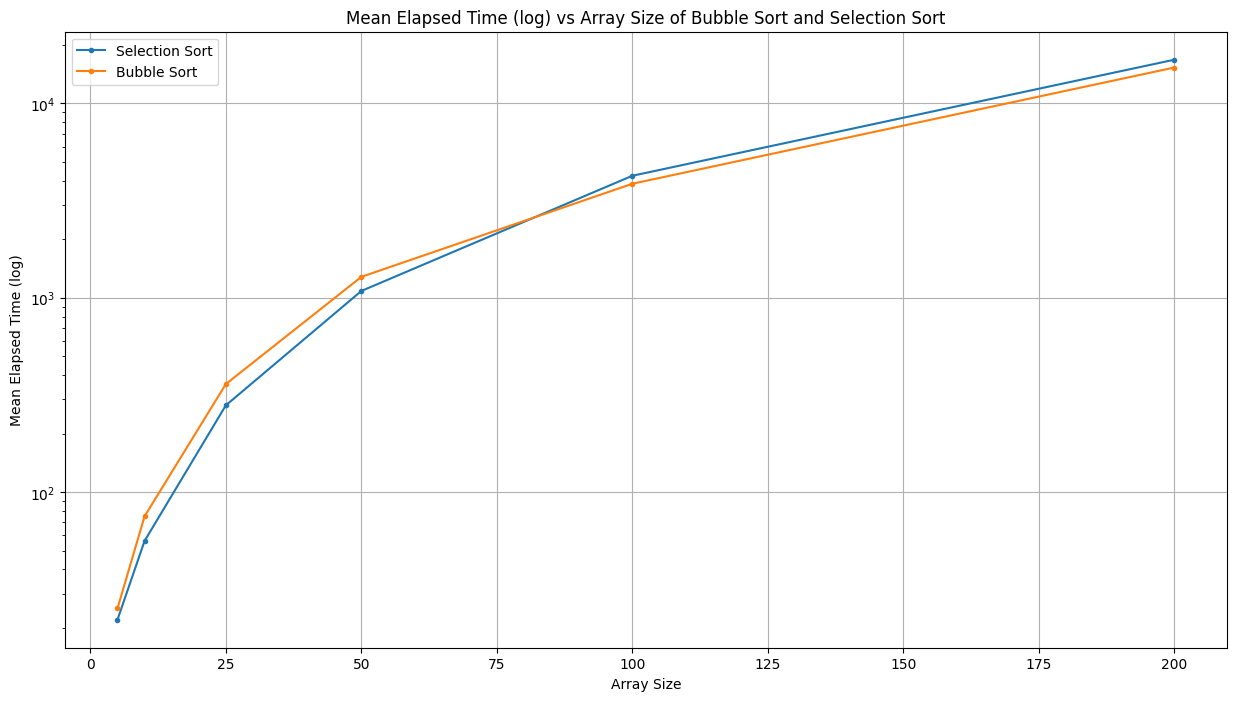

In [10]:
plot_y_as_log = True
plot_function = plt.semilogy if plot_y_as_log else plt.plot
size = (15,8)

def prepare_plot_and_return_means(df, algo):
    means = df.groupby('array_size')['elapsed_time'].mean()
    plot_function(means.index, means.values, marker='.', label=algo)
    return means.rename(algo.lower())

algo_selection = "selection sort".title()
mean_times_selection = prepare_plot_and_return_means(selection, algo_selection)
algo_bubble = "bubble sort".title()
mean_times_bubble = prepare_plot_and_return_means(bubble, algo_bubble)

x_label = 'array size'.title()
y_label = 'mean elapsed time'.title()
if plot_y_as_log: y_label += " (log)"
title = f'{y_label} vs {x_label} of {algo_bubble} and {algo_selection}'

plt.title(title)
plt.xlabel(x_label)
plt.ylabel(y_label)
plt.legend()
plt.grid(True)
plt.gcf().set_size_inches(size)

filename = f'{title.lower().replace("(", "").replace(")","").replace(" ", "_")}.png'
image_filename = f"{filename}.png"
csv_filename = f"means_{filename}.csv"

plt.savefig(filename) 
means = pd.concat([mean_times_bubble, mean_times_selection], axis=1)
means.to_csv(csv_filename)

print(f"graph of {algo_bubble} and {algo_selection} saved in {image_filename}".capitalize())
print(f"means of {algo_bubble} and {algo_selection} saved in {csv_filename}".capitalize())
display(means)

## plotting a single algo, but spoitting by sortedness

In [11]:
plot_y_as_log = True
plot_function = plt.semilogy if plot_y_as_log else plt.plot
size = (15,8)

def plot_by_sortedness(df, algo):
    algo = f"{algo} sort".title()
    means = []
    for sortedness_value in df['sortedness_text'].unique():
        subset = df[df['sortedness_text'] == sortedness_value]
        mean_times = subset.groupby('array_size')['elapsed_time'].mean()
        plot_function(
            mean_times.index,
            mean_times.values,
            marker='.',
            label=sortedness_value,
        )
        mean_times.rename(sortedness_value, inplace=True)
        means.append(mean_times)
    means = pd.concat(means, axis=1)

    x_label = 'array size'.capitalize()
    y_label = 'mean elapsed time'.capitalize()
    if plot_y_as_log: y_label += " (log)"
    title = f'{y_label} vs {x_label} of {algo}'

    plt.title(title)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.legend()
    plt.grid(True)
    plt.gcf().set_size_inches(size)

    filename = f'{title.lower().replace("(", "").replace(")","").replace(" ", "_")}'
    image_filename = f"{filename}.png"
    csv_filename = f"means_{filename}.csv"
    plt.savefig(filename) 
    means.to_csv(csv_filename)

    print(f"graph of {algo} saved in {image_filename}".capitalize())
    print(f"means of {algo} saved in {csv_filename}".capitalize())
    display(algo)
    display(means)

Graph of selection sort saved in mean_elapsed_time_log_vs_array_size_of_selection_sort.png
Means of selection sort saved in means_mean_elapsed_time_log_vs_array_size_of_selection_sort.csv


'Selection Sort'

,sorted,reversed,shuffled 25.0%,shuffled 50.0%,shuffled 100.0%,shuffled 200.0%,shuffled 500.0%
array_size,,,,,,,
5,25.000000,22.000000,20.333333,21.000000,21.333333,24.666667,20.000000
10,52.000000,57.666667,56.000000,58.333333,55.666667,55.333333,57.666667
25,266.333333,282.666667,270.666667,278.000000,290.333333,287.333333,282.333333
50,1048.000000,1083.000000,1069.666667,1082.000000,1100.666667,1098.666667,1105.666667
100,4150.333333,4252.000000,4216.000000,4247.666667,4286.000000,4276.666667,4278.000000
200,16466.333333,16708.000000,16886.666667,16716.333333,16762.333333,16842.666667,17110.000000


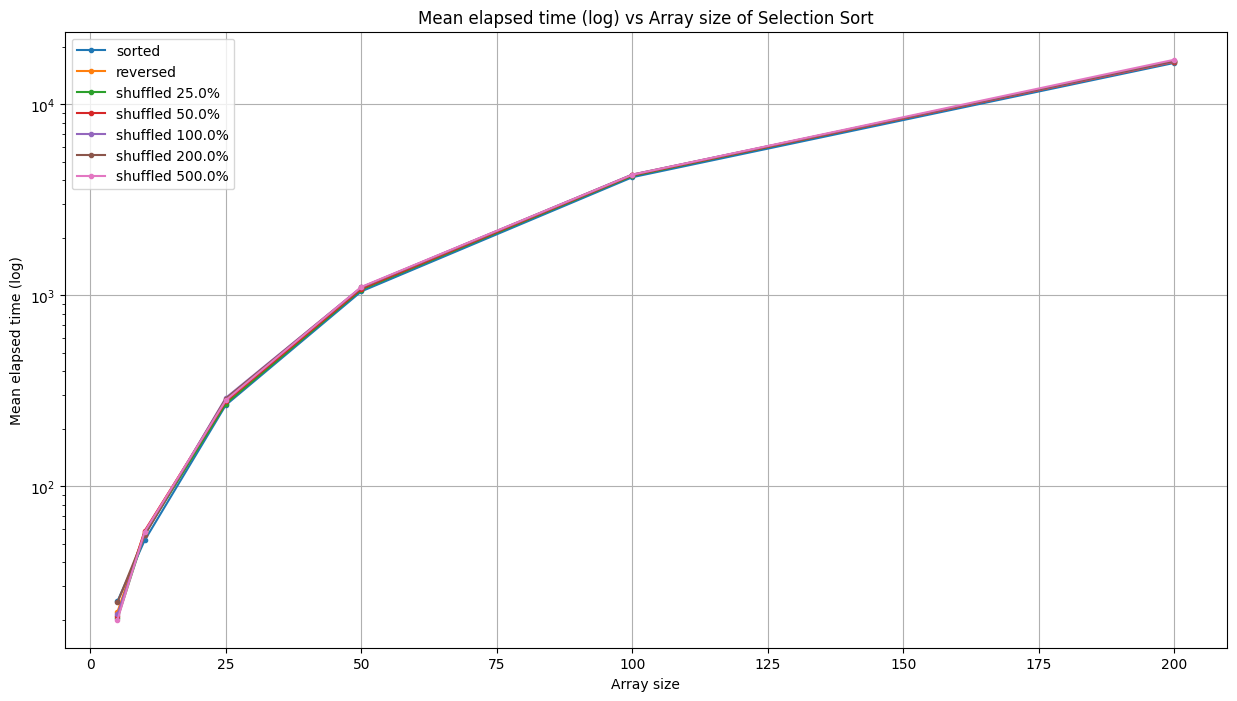

In [12]:
plot_by_sortedness(selection, "selection")

Graph of bubble sort saved in mean_elapsed_time_log_vs_array_size_of_bubble_sort.png
Means of bubble sort saved in means_mean_elapsed_time_log_vs_array_size_of_bubble_sort.csv


'Bubble Sort'

,sorted,reversed,shuffled 25.0%,shuffled 50.0%,shuffled 100.0%,shuffled 200.0%,shuffled 500.0%
array_size,,,,,,,
5,20.000000,59.000000,17.666667,18.000000,19.666667,22.333333,19.666667
10,70.666667,61.000000,48.333333,54.000000,84.000000,126.000000,81.666667
25,343.666667,339.666667,320.666667,354.333333,355.666667,370.000000,434.333333
50,1268.666667,2330.333333,1263.333333,1062.000000,1058.333333,1004.000000,982.666667
100,3398.333333,4573.333333,3689.666667,3702.666667,3857.000000,3876.000000,3927.000000
200,13178.333333,17859.666667,14375.333333,15398.000000,15749.333333,15177.333333,15370.666667


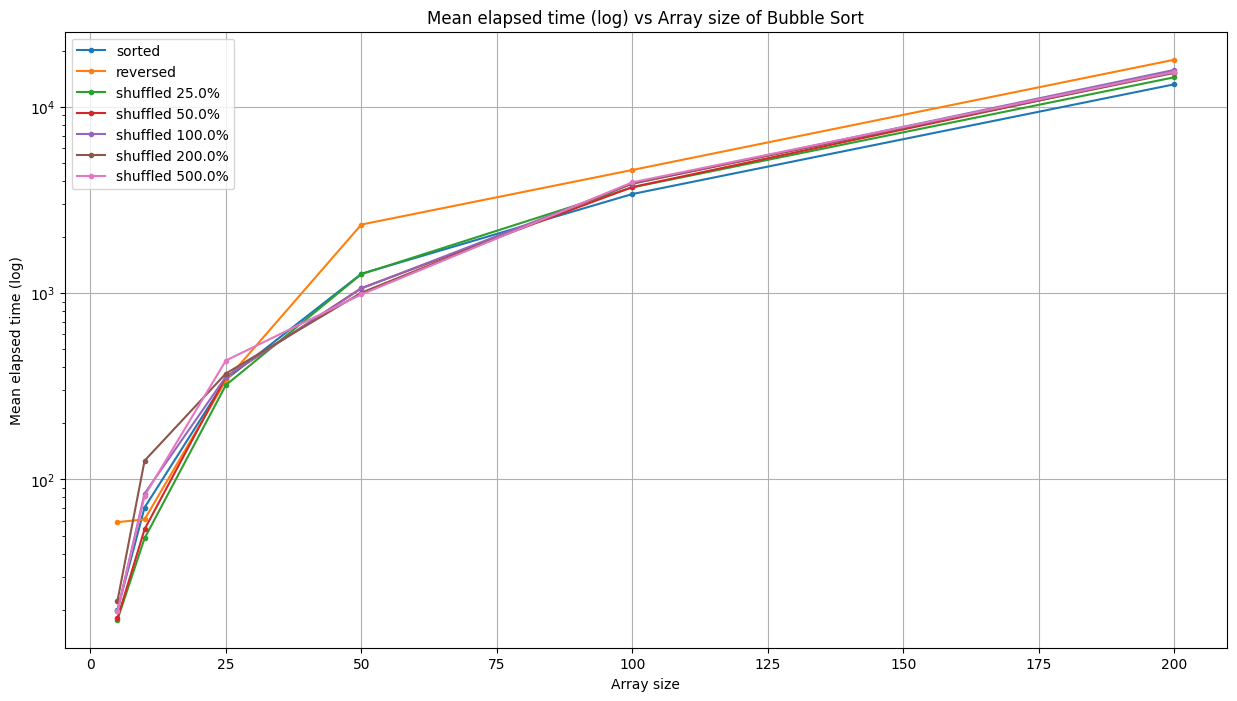

In [13]:
plot_by_sortedness(bubble, "bubble")